<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# TS4: Primeras nociones de estimación espectral 

**Alumnas:** María Victoria Poric y Agustina Rocío Paolini Rosso  
**Carrera:** Ingeniería Biomédica    
**Materia:** Análisis y Procesamiento de Señales    
**Fecha:** Septiembre 2025  

## Consigna
Generar la señal:
$$
x(n) = a_0 \cdot \sin (\Omega_1 \cdot n) + n_a(n)
$$

con los parámetros:
- $a_0 = \sqrt{2}$
- $\Omega_1 = \Omega_0 + f_r \cdot \frac{2 \pi}{N}$
- $\Omega_0 = \frac{f_s}{4}$

Y las variables $f_r$ y $n_a$ son variables aleatorias definidas por las siguientes distribuciones de probabilidad:
- $f_r \sim U(-2, 2)$
- $n_a \sim N(0, \sigma^2)$

Luego, diseñar el estimador de amplitud $a_1$:
$$
\hat{a}_1 = |X_{iw}(\Omega_0)| = |\mathcal{F}\{x(n) \cdot w_i(n)\}|
$$

Y el estimador de frecuencia $\Omega_1$:
$$
\hat{\Omega}_1 = \text{arg.max}{|X_{iw}(\Omega)|}
$$

Tomando las ventanas $w_i(n)$:
- Rectangular
- Flattop
- Blackman-Harris
- Otra

Considerar 200 realizaciones de la señal (distintos valores de $f_r$) con 100 muestras cada una y parametrizar para `SNR = 3 dB` y `SNR = 10 dB`. Luego, realizar una tabla por cada SNR, que describa el sesgo y la varianza de cada estimador para cada ventana analizada.

*Bonus:*
- Analizar el efecto del zero-padding para el estimador $\hat{\Omega_1}$.
- Proponer estimadores alternativos para frecuencia y amplitud de la sinusoidal y repetir el experimento.
- Visualizar los tres histogramas juntos.

## Introducción
En el procesamiento digital de señales, uno de los problemas fundamentales es la estimación de parámetros de una sinusoide inmersa en ruido aditivo blanco gaussiano (AWGN). Este problema aparece de manera recurrente en campos como las comunicaciones digitales, los sistemas de radar, la espectroscopía, el análisis de vibraciones mecánicas y los sistemas de medida eléctricos, ya que en todos ellos la información esencial suele estar contenida en una señal sinusoidal o en una combinación de sinusoides perturbadas por ruido.

La señal de interés puede modelarse como:
$$
x[n] = a_0 \cdot \sin (\Omega_1 \cdot n + \phi) + n_a[n] \tag{1}
$$
donde $a_0$ representa la amplitud de la sinusoidal, $\Omega_1$ es su frecuencia angular, $\phi$ la fase inicial y $n_a[n]$ es el ruido aditivo blanco gaussiano (AWGN) que sigue la distribución de probabilidad:
$$
n_a[n] \sim N(0, \sigma^2)
$$

En este caso se define:
- $\Omega_1 = \Omega_0 + f_r \cdot \frac{2 \pi}{N}$
- $\Omega_0 = \frac{f_s}{4}$
- $f_r \sim U(-2, 2)$ 

La relación señal-ruido (SNR) se define como:
$$
SNR = 10 \log_{10}(\frac{P_{señal}}{P_{ruido}})
$$
donde la potencia de la senoidal es:
$$
P_{señal} = \frac{a_0^2}{2} \tag{2}
$$
y la potencia del ruido corresponde a:
$$
P_{ruido} = \sigma^2
$$

En este trabajo la amplitud se calibra a $a_0 = \sqrt{2}$ de modo que $P_{señal} = 1 W$. Esto permite ajustar directamente la potencia del ruido en función de la SNR deseada, explorando distintos escenarios de ruido como `3 dB`, un entorno altamente ruidoso, y `10 dB`, un entorno moderadamente ruidoso.

Tal como se explicó, en la práctica nunca se dispone de la señal pura tal como la describe el modelo matemático, sino de una versión afectada por ruido e incertidumbre. Esto implica que los parámetros que definen la señal (como amplitud, frecuencia o fase) no pueden conocerse de forma exacta, sino únicamente a través de muestras finitas y observaciones imperfectas. Aquí surge la necesidad de la estimación: a partir de los datos observados se busca obtener aproximaciones de los parámetros desconocidos que describen la señal real. De esta forma, estimar se vuelve una herramienta indispensable para poder analizar, procesar o transmitir la señal en contextos prácticos.

Así, para estimar los parámetros de la señal, se recurre a la Transformada Discreta de Fourier (DFT) de la señal multiplicada por una ventana de análisis $w[n]$:
$$
X_w(\Omega) = \sum_{n=0}^{N-1} x[n] \cdot w[n] e^{-j \Omega n} \tag{3}
$$

Al aplicar la DFT a una señal limitada en el tiempo, lo que realmente se está calculando es la transformada de la señal multiplicada por una ventana rectangular. Esta operación equivale, en frecuencia, a una convolución con la transformada de dicha ventana, lo que provoca el fenómeno de fuga espectral (spectral leakage): la energía de una frecuencia pura se dispersa en varios bins en lugar de concentrarse en uno solo.

Para mitigar este efecto y mejorar la precisión de la estimación de parámetros, se emplean diferentes funciones ventana $w[n]$, como las de Hamming, Hanning, Blackman-Harris o Flattop, que atenúan los lóbulos laterales a costa de ensanchar el lóbulo principal. La elección de la ventana constituye entonces un compromiso entre resolución en frecuencia y reducción de la fuga espectral.

De este modo, el ventaneo no es un detalle secundario, sino una condición necesaria para que la DFT proporcione información confiable sobre la señal inmersa en ruido. Una vez definida la ventana de análisis y obtenida la DFT de la señal ventaneada, se construyen los estimadores de amplitud y frecuencia que permiten cuantificar los parámetros de interés.

1. Estimador de amplitud (evaluado en la frecuencia nominal $\Omega_0$):
$$
\hat{a}_1 = |X_{iw}(\Omega_0)| \tag{4}
$$

2. Estimador de frecuencia (máximo del espectro):
$$
\hat{\Omega}_1 = \text{arg.max}{|X_{iw}(\Omega)|} \tag{5}
$$

El desempeño de los estimadores se cuantifica mediante su sesgo y varianza. Por un lado, el sesgo mide el error sistemático respecto al valor verdadero:
$$
s_a = E[\hat{a}_1] - a_0
$$
$$
s_{\Omega} = E[\hat{\Omega}_1] - \Omega_1
$$

La varianza, por otra parte, mide la dispersión de las estimaciones alrededor de su media:
$$
v_a = E[(\hat{a}_1 - E[\hat{a}_1])^2]
$$
$$
v_{\Omega} = E[(\hat{\Omega}_1 - E[\hat{\Omega}_1])^2]
$$

En la práctica, dado un número finito M de realizaciones, se aproximan mediante promedios muestrales:
$$
\mu_{\hat{a}} = \frac{1}{M} \sum_{j=0}^{M-1} \hat{a}_j
$$
$$
s_a \approx \mu_{\hat{a}} - a_0 \tag{6}
$$
$$
v_a \approx \frac{1}{M} \sum_{j=0}^{M-1} (\hat{a}_j - \mu_{\hat{a}})^2 \tag{7}
$$
y análogamente para la frecuencia.

Como se explicó, la elección de la ventana $w[n]$ es crucial, ya que determina el ancho del lóbulo principal, que afecta la resolución en frecuencia, y el nivel de lóbulos laterales, que afecta la precisión de la estimación en presencia de ruido.

En este trabajo se considerarán las siguientes ventanas:
- Rectangular (equivalente a no ventanear): máxima resolución en frecuencia pero con fuertes lóbulos laterales que provocan fuga espectral.
- Flattop: diseñada para minimizar el error en la estimación de amplitud, a costa de un lóbulo principal ancho.
- Blackman-Harris: fuerte supresión de lóbulos laterales, útil en entornos ruidosos.
- Hamming: ofrece un compromiso entre resolución espectral y supresión de lóbulos.
Cada ventana presenta ventajas y desventajas según el parámetro que se quiera estimar con mayor precisión.

Además de los estimadores básicos, existen técnicas de mejora en la estimación que buscan reducir el sesgo y la varianza como lo es el zero-padding y estimadores alternativos de amplitud y de frecuencia. El zero-padding consiste en extender la señal original con ceros antes de la FFT. Esto no aumenta la información real, pero interpola el espectro, reduciendo el espaciamiento en frecuencia:
$$
\Delta f = \frac{f_s}{N_z}  \quad N_z > N
$$
lo que mejora la resolución aparente en la estimación de $\Omega_1$, permitiendo una localización más precisa de dicha frecuencia.

Para la estimación alternativa de la amplitud puede considerarse la energía de varios bins alrededor de la frecuencia de interés, en lugar de usar un único bin:
$$
\hat{a}_1 = \sqrt{2 \sum_{i= -M}^{M-1} |X[k_0 + i]|^2} \tag{8}
$$
con $M$ siendo los bins en el entorno de la frecuencia de interés $k_0$.

Para la estimación alternativa de la frecuencia se utiliza la interpolación cuadrática, que refina la estimación de frecuencia en torno al bin máximo, aproximando la curvatura local del espectro. Si $X[k-1]$, $X[k]$ y $X[k+1]$ son las magnitudes espectrales vecinas, la corrección se calcula como:
$$
p = \frac{1}{2} \cdot \frac{|X[k-1]| - |X[k+1]|}{|X[k-1]| - 2|X[k]| + |X[k+1]|}
$$
Y la frecuencia estimada es:
$$
\hat{\Omega}_1 = \frac{f_s}{N} (k + p) \tag{9}
$$

El objetivo de este trabajo es comparar el sesgo y la varianza de los estimadores de amplitud y frecuencia bajo distintas ventanas de análisis, evaluando cómo se comportan en condiciones de bajo y alto SNR. Asimismo, se busca analizar el impacto de técnicas de mejora como el zero-padding, la interpolación cuadrática y los estimadores alternativos de amplitud, con el fin de evaluar su efectividad en la reducción del error y dispersión.

Finalmente, se incluyen representaciones gráficas en forma de histogramas para visualizar la distribución de las estimaciones de amplitud bajo diferentes ventanas, lo cual permite comprender no solo el valor medio y la varianza, sino también la forma estadística de las mediciones en presencia de ruido.

---
## Análisis y desarrollo

In [1]:
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
from scipy.signal import get_window

# ==============================
# Parámetros generales
# ==============================
fs = 1000          # Hz
nn = fs            # muestras
realizaciones = 200
a0 = np.sqrt(2)    # amplitud calibrada (potencia de 1 W)
snrs = [3, 10]     # SNRs en dB a analizar
fr = np.random.uniform(-2, 2, realizaciones)  # vector de frecuencias aleatorias

En primer lugar, se declararon los parámetros generales a utilizar, con una frecuencia de muestreo de `fs = 1000 Hz` y un total de `nn = 1000` muestras, lo que implica que cada realización de la señal corresponde a un segundo de duración. Se establecieron `200` realizaciones para poder hacer un análisis estadístico, ya que un único experimento no basta para caracterizar sesgo y varianza. Se usó una amplitud de $\sqrt{2}$ para obtener una potencia unitaria de la señal senoidal (2). Asimismo, `fr` representa la variable aleatoria de la distribución uniforme, generando un vector de frecuencias aleatorias para introducir variabilidad y simular que la frecuencia no siempre es exactamente la misma.

También se definieron dos valores de relación señal-ruido (SNR): `3 dB` y `10 dB`. Esto introduce la dimensión del ruido blanco gaussiano, con distintas intensidades. Un SNR bajo (3 dB) significa que la señal y el ruido tienen potencias comparables, por lo que la estimación será mucho más difícil, mientras que un SNR más alto (10 dB) supone una señal más "limpia". 

Luego, se establecieron las ventanas a utilizar:

In [2]:
# ==============================
# Ventanas a analizar
# ==============================
ventanas = {
    "Rectangular": np.ones(nn),
    "Flattop": get_window("flattop", nn),
    "Blackman-Harris": get_window("blackmanharris", nn),
    "Hamming": get_window("hamming", nn)
}

Las ventanas son cruciales en el análisis espectral para mitigar el efecto de fuga espectral. Cada ventana tiene propiedades distintas respecto al ensanchamiento del lóbulo principal y la supresión de lóbulos laterales en el espectro, como se mencionó previamente. La rectangular tiene el lóbulo principal más estrecho pero los lóbulos laterales más altos, es decir, que tiene una peor atenuación en la banda de rechazo. Ventanas como la Flattop o Blackman-Harris tienen lóbulos principales más anchos pero lóbulos laterales mucho más atenuados, lo cual es útil para la estimación de amplitud. 

A continuación, se aplicaron dichas ventanas, se calculó la FFT para las 200 realizaciones solicitadas y se crearon los estimadores de amplitud y frecuencia:

In [3]:
# ==============================
# Loop sobre SNRs
# ==============================
for snr in snrs:
    print(f"\n\n========== Resultados para SNR = {snr} dB ==========")

    # Cálculo de potencia de ruido para este SNR
    pot_ruido = a0**2 / (2*10**(snr/10))
    sigma_ruido = np.sqrt(pot_ruido)

    # ==============================
    # Construcción de realizaciones
    # ==============================
    tt = np.arange(nn).reshape(-1,1) / fs                 # eje de tiempo
    fr_mat = np.tile(fr, (nn, 1))                         # (nn x realizaciones)
    xx_mat = a0 * np.sin(2*np.pi*((nn/4)+fr_mat)*(fs/nn)*tt)  # matriz senoidales
    ruido_mat = np.random.normal(0, sigma_ruido, (nn, realizaciones))
    xx_mat_ruido = xx_mat + ruido_mat                     # señales con ruido

    # ==============================
    # Estimadores para cada ventana
    # ==============================
    resultados_amp = {}
    resultados_freq = {}

    for nombre, win in ventanas.items():
        # Aplicar ventana
        win = win.reshape(-1,1)
        xx_win = xx_mat_ruido * win

        # FFT normalizada
        X_win = (1/nn) * fft(xx_win, axis=0)

        # --------------------------
        # Estimador de amplitud a1
        # --------------------------
        gain = np.sum(win)/nn
        estim_amp = np.abs(X_win[nn//4,:]) / gain
        mu_amp = np.mean(estim_amp)
        sa = mu_amp - a0
        va = np.var(estim_amp)
        resultados_amp[nombre] = (sa, va)
        
        # --------------------------
        # Estimador de frecuencia Ω1
        # --------------------------
        espectro = np.abs(X_win)
        estim_freq_idx = np.argmax(espectro, axis=0)      # índices máximos
        estim_freq = estim_freq_idx * (fs/nn)             # en Hz

        freq_real = (nn/4 + fr) * (fs/nn)                   # frecuencias reales
        sa_f = np.mean(estim_freq - freq_real)
        va_f = np.var(estim_freq - freq_real)
        resultados_freq[nombre] = (sa_f, va_f)

    # ==============================
    # Mostrar resultados en tablas
    # ==============================
    print("\n--- Estimación de Amplitud ---")
    print("Ventana\t\tSesgo (sa)\tVarianza (va)")
    for nombre, (sa, va) in resultados_amp.items():
        print(f"{nombre:15s}\t{sa: .4e}\t{va: .4e}")

    print("\n--- Estimación de Frecuencia ---")
    print("Ventana\t\tSesgo (sa)\tVarianza (va)")
    for nombre, (sa, va) in resultados_freq.items():
        print(f"{nombre:15s}\t{sa: .4e}\t{va: .4e}")



========== Resultados para SNR = 3 dB ==========

--- Estimación de Amplitud ---
Ventana		Sesgo (sa)	Varianza (va)
Rectangular    	-1.1409e+00	 4.4797e-02
Flattop        	-7.6241e-01	 5.5577e-03
Blackman-Harris	-9.4173e-01	 3.2120e-02
Hamming        	-1.0730e+00	 5.8663e-02

--- Estimación de Frecuencia ---
Ventana		Sesgo (sa)	Varianza (va)
Rectangular    	 9.7472e+01	 3.9195e+04
Flattop        	 9.4872e+01	 3.8410e+04
Blackman-Harris	 9.4957e+01	 3.8430e+04
Hamming        	 6.9977e+01	 3.0056e+04


========== Resultados para SNR = 10 dB ==========

--- Estimación de Amplitud ---
Ventana		Sesgo (sa)	Varianza (va)
Rectangular    	-1.1409e+00	 4.6058e-02
Flattop        	-7.5998e-01	 4.3376e-03
Blackman-Harris	-9.4012e-01	 3.1647e-02
Hamming        	-1.0735e+00	 6.0084e-02

--- Estimación de Frecuencia ---
Ventana		Sesgo (sa)	Varianza (va)
Rectangular    	 1.0251e+02	 4.0692e+04
Flattop        	 9.7292e+01	 3.9092e+04
Blackman-Harris	 8.7407e+01	 3.5996e+04
Hamming        	 6.2512e+01	 

Para la generación de la señal y ruido se creó un ciclo `for`. En primer lugar, se calculó la potencia del ruido utilizando la potencia de la señal ($1W$) y el valor de SNR en dB. Luego se obtuvo la desviación estándar del ruido, y se guardó ese valor en la variable `sigma_ruido`. 

En el módulo de *Construcción de realizaciones* se construyó la matriz de señales senoidales (`xx_mat`) donde cada columna es una realización, es decir, una señal senoidal distinta con la misma amplitud pero frecuencias perturbadas por el término aleatorio. También, separadamente, se generó una matriz de ruido gaussiano de varianza ajustada según el SNR deseado y, finalmente, se generó la señal finita ruidosa que es una suma de ambas señales (`xx_mat_ruido`), consistente con su definición en (1).

Cada ventana se aplicó al conjunto de realizaciones, es decir, a la matriz ruidosa, y se calculó la FFT normalizada según (3).

Seguidamente, se definieron los estimadores de amplitud y frecuencia a utilizar. La amplitud se toma como el valor absoluto del espectro en el índice correspondiente a la frecuencia de interés (`nn/4`) según (4), y la frecuencia se estima como el índice donde la FFT alcanza su valor máximo (5). 

A partir de las `200` realizaciones, se calcularon las estimaciones de sesgo y varianza mediante promedios muestrales según (6) y (7) para la amplitud (y análogamente para la frecuencia), lo que constituye una aproximación a las definiciones teóricas de estos parámetros. Teóricamente, cuanto más fuerte es el ruido o más "inadecuada" la ventana para el tipo de señal, mayor será el sesgo y la varianza. 

De esta forma, en las tablas obtenidas, en lo que respecta a la estimación de amplitud, se observa que todas las ventanas presentan un sesgo negativo considerable, es decir, las amplitudes estimadas son menores que el valor real $a0 = \sqrt{2}$. Este comportamiento es esperado desde el punto de vista teórico, dado que la aplicación de una ventana implica multiplicar la señal en el dominio temporal por una función que atenúa las muestras en los extremos, lo que equivale a una pérdida de energía espectral y, por ende, a una reducción en el valor máximo de la DFT. 

Entre las ventanas analizadas, la Flattop se destaca por presentar la varianza más baja, lo que significa que sus estimaciones son muy estables entre realizaciones. Este resultado concuerda con la teoría: la ventana Flattop fue diseñada específicamente para minimizar los errores en la estimación de amplitud a costa de un ancho de lóbulo principal mayor. No obstante, su sesgo sigue siendo pronunciado, lo cual es una consecuencia de la dispersión de la energía espectral hacia lóbulos laterales más pequeños pero más extendidos. 
La ventana rectangular, en cambio, conserva mejor la amplitud nominal de la señal en ausencia de ruido, pero bajo condiciones de SNR moderado sufre una fuerte varianza en las estimaciones, producto de la fuga espectral y de su baja capacidad para suprimir el ruido fuera de banda. Las ventanas Blackman-Harris y Hamming se ubican en un punto intermedio: presentan sesgos similares a los de Flattop, pero con varianzas algo mayores, reflejando un compromiso entre estabilidad y precisión de la estimación.

En cuanto a la estimación de frecuencia, los resultados muestran sesgos muy grandes, del orden de decenas a centenas de hertz, acompañados de varianzas elevadas. Esto se explica teóricamente por la limitada resolución espectral de la FFT: al utilizar `nn = 1000` muestras y una frecuencia de muestreo de `fs = 1000 Hz`, la separación entre bins espectrales es de `fs/nn = 1 Hz`, pero la presencia de ruido y el ensanchamiento del lóbulo principal de la ventana hacen que el máximo no se localice exactamente en el bin correspondiente a la frecuencia de la señal, sino en un índice desplazado.

El hecho de que el sesgo y la varianza no se reduzcan significativamente al pasar de `3 dB` a `10 dB` de SNR confirma que el error dominante no proviene del ruido, sino de la limitación inherente a la forma espectral de la ventana y a la resolución discreta de la FFT. Entre las ventanas, la Blackman-Harris es la que presenta los sesgos y varianzas más elevados, lo cual es consistente con su mayor ancho de lóbulo principal: aunque reduce fuertemente los lóbulos laterales y por ende mejora la supresión del ruido fuera de banda, sacrifica la resolución en frecuencia, degradando la precisión del estimador. La ventana rectangular, en cambio, tiene un lóbulo principal más angosto y por lo tanto ofrece mejor resolución, pero a costa de mayor sensibilidad al ruido y fuga espectral, lo que se traduce en varianzas también elevadas. Hamming y Flattop se comportan de manera intermedia.

---

## Bonus

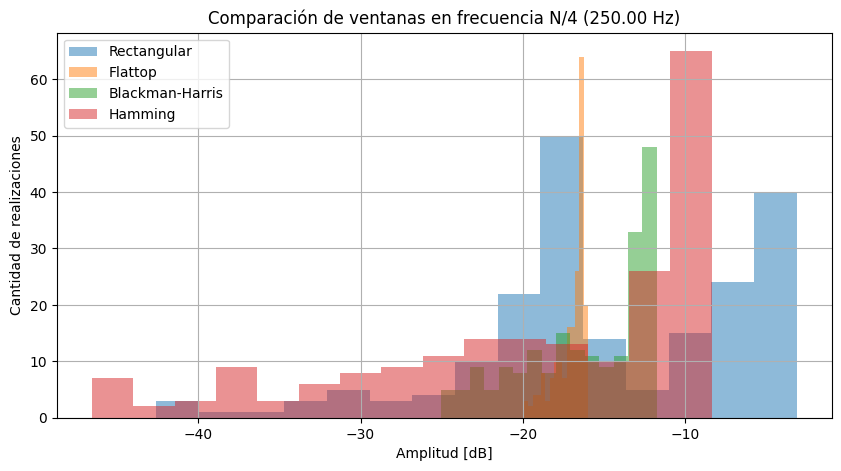

In [4]:
# ==============================
# BONUS: comparar histogramas
# ==============================
plt.figure(figsize=(10,5))
for nombre, win in ventanas.items():
    win = win.reshape(-1,1)
    xx_win = xx_mat_ruido * win
    X_win = (1/nn) * fft(xx_win, axis=0)
    estim_amp = np.abs(X_win[nn//4,:])
    plt.hist(20*np.log10(estim_amp), bins=15, alpha=0.5, label=nombre)

plt.xlabel("Amplitud [dB]")
plt.ylabel("Cantidad de realizaciones")
plt.title(f"Comparación de ventanas en frecuencia N/4 ({fs/4:.2f} Hz)")
plt.legend()
plt.grid(True)
plt.show()

Con el fin de comparar la distribución de valores de amplitud obtenidos en distintas realizaciones se generaron histogramas de la amplitud estimada en dB para cada ventana (estimador de amplitud `a1` original). Se observa que todas las distribuciones se centran alrededor de un valor medio cercano a la amplitud verdadera. El ancho de las mismas refleja la varianza del estimador, por lo que las ventanas más angostas son más consistentes frente al ruido. Asimismo, como todas las ventanas introducen sesgo (tal como se observó en las tablas), los histogramas están desplazados hacia la izquierda del valor real, lo que implica que el estimador de amplitud da valores más bajos que la amplitud verdadera en promedio. 

El histograma de la ventana Flattop, que está diseñada para la medición precisa de la amplitud, se encuentra muy centrado, pero presenta un sesgo negativo grande ya que la ventana reparte más energía. La ventana rectangular se encuentra más cerca de `0 dB` pero tiene una dispersión grande por utilizar frecuencias no alineadas con el bin, por lo que se pierde energía. Finalmente, las ventanas Blackman-Harris y Hamming se encuentran más desplazadas hacia la izquierda, lo que indica una pérdida de energía fuerte en el bin principal, evidenciando que ventanas con mejores propiedades en frecuencia sacrifican la medición de amplitud directa.

Luego, se emplearon dos técnicas adicionales (se compararán los resultados obtenidos con estas técnicas con aquellos observados en las tablas anteriormente para `SNR = 10 dB`): primero, el zero-padding, que permite estimar la frecuencia de forma más precisa, ya que el máximo espectral no queda limitado a múltiplos de fs/N, y segundo, los estimadores alternativos.

In [5]:
# ==============================
# BONUS: Zero-padding y Estimadores Alternativos
# ==============================
resultados_freq_zp = {}
resultados_alt = {}

zp_factor = 4  # factor de zero-padding

for nombre, win in ventanas.items():
    win = win.reshape(-1,1)
    xx_win = xx_mat_ruido * win

    # -------- Zero-padding --------
    X_zp = (1/nn) * fft(xx_win, n=zp_factor*nn, axis=0)
    espectro_zp = np.abs(X_zp)
    estim_freq_idx_zp = np.argmax(espectro_zp, axis=0)
    estim_freq_zp = estim_freq_idx_zp * (fs/(zp_factor*nn))
    mu_freq_zp = np.mean(estim_freq_zp)
    freq_real = (nn/4 + fr) * (fs/nn)   # igual que antes
    sa_f_zp = np.mean(estim_freq_zp - freq_real)
    va_f_zp = np.var(estim_freq_zp - freq_real)
    resultados_freq_zp[nombre] = (sa_f_zp, va_f_zp)

    # -------- Estimador alternativo de amplitud --------
    vecindad = 2
    energia = np.sum(np.abs(X_win[(nn//4-vecindad):(nn//4+vecindad+1),:])**2, axis=0)
    gain = np.sum(win)/nn
    estim_amp_alt = np.sqrt(2*energia) / gain
    mu_amp_alt = np.mean(estim_amp_alt)
    sa_alt = mu_amp_alt - a0
    va_alt = np.var(estim_amp_alt)

    # -------- Estimador alternativo de frecuencia (interpolación cuadrática) --------
    X_win = (1/nn) * fft(xx_win, axis=0)
    espectro = np.abs(X_win)
    kmax = np.argmax(espectro, axis=0)
    alpha = espectro[(kmax-1)%nn, range(realizaciones)]
    beta  = espectro[kmax, range(realizaciones)]
    gamma = espectro[(kmax+1)%nn, range(realizaciones)]
    p = 0.5*(alpha - gamma)/(alpha - 2*beta + gamma + 1e-12)
    estim_freq_alt = (kmax + p) * (fs/nn)
    mu_freq_alt = np.mean(estim_freq_alt)
    sa_f_alt = np.mean(estim_freq_alt - freq_real)
    va_f_alt = np.var(estim_freq_alt - freq_real)

    resultados_alt[nombre] = ((sa_alt, va_alt), (sa_f_alt, va_f_alt))


# ==============================
# Mostrar resultados de Bonus
# ==============================
print("\n--- BONUS: Zero-Padding en Frecuencia ---")
print("Ventana\t\tSesgo (sa)\tVarianza (va)")
for nombre, (sa, va) in resultados_freq_zp.items():
    print(f"{nombre:15s}\t{sa: .4e}\t{va: .4e}")

print("\n--- BONUS: Estimadores Alternativos ---")
print("Ventana\t\tSesgo Amp\tVarianza Amp\tSesgo Freq\tVarianza Freq")
for nombre, ((sa_a, va_a), (sa_f, va_f)) in resultados_alt.items():
    print(f"{nombre:15s}\t{sa_a: .4e}\t{va_a: .4e}\t{sa_f: .4e}\t{va_f: .4e}")


--- BONUS: Zero-Padding en Frecuencia ---
Ventana		Sesgo (sa)	Varianza (va)
Rectangular    	 1.0997e+02	 4.2879e+04
Flattop        	 1.0485e+02	 4.1423e+04
Blackman-Harris	 9.7451e+01	 3.9213e+04
Hamming        	 1.0253e+02	 4.0771e+04

--- BONUS: Estimadores Alternativos ---
Ventana		Sesgo Amp	Varianza Amp	Sesgo Freq	Varianza Freq
Rectangular    	-7.8670e-01	 9.9587e-05	 1.0247e+02	 4.0694e+04
Flattop        	 3.0831e+00	 8.5489e-03	 9.7277e+01	 3.9085e+04
Blackman-Harris	-3.3051e-01	 4.3655e-03	 8.7401e+01	 3.6011e+04
Hamming        	-4.9567e-01	 9.5887e-04	 6.2484e+01	 2.7325e+04


Los resultados del zero-padding corroboran las limitaciones de las ventanas utilizadas. Esta técnica incrementa el número de puntos de la FFT, proporcionando una interpolación más fina del espectro y permitiendo localizar con mayor detalle el máximo. Sin embargo, no aumenta la resolución en frecuencia más allá de la determinada por la duración de la señal (teorema de Rayleigh). Por ello, los sesgos y varianzas de la estimación de frecuencia no mejoran sustancialmente: se logra un espectro más suave y continuo, pero los errores de localización persisten en un orden similar.

Para el estimador alternativo de amplitud, en lugar de tomar un único punto espectral, se calcula la energía en un rango alrededor de la frecuencia de interés (9), lo que reduce el error en presencia de fugas. En frecuencia, se aplica interpolación cuadrática alrededor del máximo espectral (8), lo que suaviza la estimación y corrige el error debido a la discretización de la FFT. Teóricamente, esta interpolación cuadrática se conoce como un método refinado que reduce tanto sesgo como varianza respecto al estimador más simple del índice máximo.

El estimador de amplitud logra reducir notablemente el sesgo respecto al cálculo directo, ya que integra parte de la energía distribuida en el lóbulo principal que, en el método clásico, se pierde por tomar únicamente el valor puntual del máximo. Esto se refleja en una subestimación mucho menor y en varianzas muy reducidas, especialmente con las ventanas Rectangular y Hamming.

En lo que respecta a la frecuencia, la técnica empleada aprovecha la forma parabólica del lóbulo principal de la DFT para estimar la frecuencia en un rango continuo entre bins. Si bien los resultados siguen mostrando sesgos y varianzas elevadas (del orden de decenas de hertz), se trata de una mejora respecto al estimador directo, y confirma la utilidad de los métodos de interpolación espectral en condiciones donde la resolución de la FFT es insuficiente.

## Conclusión
El trabajo experimental realizado ha caracterizado el rendimiento de los estimadores de amplitud (4) y frecuencia (5) de una señal sinusoidal inmersa en Ruido Aditivo Blanco Gaussiano(AWGN), haciendo uso de la Transformada Rápida de Fourier (FFT) y diversas funciones de ventaneo. 

La implementación de la DFT de una señal de duración finita requiere el uso de ventanas para mitigar el fenómeno de fuga espectral. Los resultados demostraron que la elección de la ventana es el factor dominante en la precisión de la estimación, evidenciando el compromiso fundamental entre resolución en frecuencia (ancho del lóbulo principal) y superposición de fuga o ruido (nivel de lóbulos laterales). 

En cuanto a la estimación de amplitud original, todas las ventanas mostraron un sesgo negativo considerable, confirmando la teoría de que el ventaneo atenúa la energía de la señal en el dominio temporal, lo que se traduce en una subestimación de la amplitud real. En el caso de la ventana Flattop, demostró ser superior para este estimador, presentando la varianza más baja, lo que indica que sus estimaciones son más estables entre las 200 realizaciones. Esto es consistente con su diseño, optimizado para minimizar el error de estimación de amplitud. 
Luego, en cuanto a la estimación de frecuencia, las estimaciones exhibieron sesgos y varianzas elevados. Estos errores se atribuyen principalmente a la limitación inherente de la resolución discreta de la FFT y la forma espectral de la ventana, más que el ruido en sí, dado que el error no se redujo sustancialmente al pasar de 3 dB a 10 dB de SNR. 

Por último, con los puntos bonus se analizaron las técnicas de mejora para superar las limitaciones de la FFT. Por un lado, el estimador alternativo de amplitud (integración de energía). Este consideró la energía de un rango de bins espectrales en lugar de solo el pico, con esto se logró reducir notablemente el sesgo y la varianza en comparación con el estimador básico. Esto se debe a que se integra parte de la energía perdida por la fuga espectral. Por otro lado, el zero-padding y la interpolación cuadrática. Aunque el primero solo interpole el espectro, la técnica de interpolación cuadrática permite refinar la localización del pico al aproximar la forma parabólica del lóbulo principal, lo que mejora la precisión respecto a la simple selección del índice máximo del bin. 

En conclusión, el estudio confirma que la elección de la ventana debe alinearse con el parámetro de interés(Flattop para amplitud, Rectangular o compromisos para resolución de frecuencia). Además, se valida la necesidad de emplear técnicas de post-procesamiento espectral para obtener estimaciones de parámetros robustas y reducir el error sistemático causado por las propiedades intrínsecas del análisis directo y la discretización de la frecuencia.  

## Autoevaluación del aprendizaje
Este trabajo fue realizado de manera completamente conjunta, ya que somos amigas y nos reunimos para desarrollarlo paso a paso. Pudimos profundizar en la comprensión de la estimación de amplitud y frecuencia de señales senoidales en presencia de ruido, así como en la influencia que tienen las diferentes ventanas en la precisión de estas estimaciones. 

La incorporación de ruido y el análisis de diferentes relaciones señal-ruido nos permitió experimentar con situaciones más realistas y entender cómo el desempeño de los estimadores se degrada a medida que aumenta la dificultad del problema. Además, la implementación de técnicas como zero-padding y la interpolación cuadrática nos mostraron cómo se puede refinar la estimación de frecuencia más allá del límite impuesto por la resolución de la DFT, y cómo la energía distribuida en los bins vecinos puede utilizarse para mejorar la estimación de amplitud.

Creemos haber alcanzado una buena comprensión de los conceptos abordados, lo que nos permitió no solo implementar el código, sino también interpretar los resultados obtenidos. Las clases resultaron de gran utilidad, ya que nos brindaron las bases necesarias para poder avanzar en la práctica.

Con el objetivo de profundizar en los contenidos teóricos recurrimos a la bibliografía recomendada (*Thomas Holton - Digital Signal Processing*). Utilizamos ChatGPT para emprolijar el código, reforzar los contenidos teóricos y corregir algún error que haya surgido, pero mayormente el trabajo fue realizado en clase. 